<a href="https://colab.research.google.com/github/Gcango/Projecto_9/blob/main/Sorfis_Lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste Exercíco Analisou-se, no decorrer do notebook, os dados extraídos de uma base referentes a Sorfis_Lda, líder de vendas a nível dos continentes como ASIA, EUROPA E AMERICA DO NORTE. Os dados analisados são referentes a vendas de diferentes produtos qu estão divididos por subcategorias. No decorrer do nootbook, varias questões surgem e são logo respondidas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('/content/Online Sales Data.csv')
dados.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [4]:
dados.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [5]:
vendas = dados.copy()

In [6]:
vendas["Date"] = pd.to_datetime(vendas["Date"])

In [7]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [40]:
#1) - Analisar a Receita por cada categoria do dataset

rpc = vendas.groupby("Product Category")["Total Revenue"].sum().reset_index()
rpc

,Product Category,Total Revenue
0,Beauty Products,2621.90
1,Books,1861.93
2,Clothing,8128.93
3,Electronics,34982.41
4,Home Appliances,18646.16
5,Sports,14326.52


In [13]:
print("De acordo com as vendas, os produtos Electronicos apresentam uma receita maior em relação aos demais.")

De acordo com as vendas, os produtos Electronicos apresentam uma receita maior em relação aos demais.


In [ ]:
#2) - Analisar a distribuição de vendas por cada região, prespectivando o crescimento

In [14]:
vpr = vendas.groupby("Region")["Units Sold"].sum().reset_index()
vpr

,Region,Units Sold
0,Asia,233
1,Europe,105
2,North America,180


In [16]:
print("As vendas por regiões, são lideradas da seguinte maneira:")
print(" 1º ASIA")
print(" 2º North America")
print(" 3º Europe")

As vendas por regiões, são lideradas da seguinte maneira:
 1º ASIA
 2º North America
 3º Europe


In [ ]:
#3) - Como podem ser analisadas as vendas de acordo com o tempo?

In [18]:
vpt = vendas.groupby("Date")["Total Revenue"].sum().reset_index()
vpt.head(10)

,Date,Total Revenue
0,2024-01-01,1999.98
1,2024-01-02,499.99
2,2024-01-03,209.97
3,2024-01-04,63.96
4,2024-01-05,89.99
5,2024-01-06,149.95
6,2024-01-07,2499.99
7,2024-01-08,1199.98
8,2024-01-09,539.94
9,2024-01-10,51.98


In [47]:
#4) - Como se pode analisar quanto ao metodo de pagamento exercido na Sorfis_Lda?

mpag = vendas["Payment Method"].value_counts().reset_index()
mpag

,Payment Method,count
0,Credit Card,120
1,PayPal,80
2,Debit Card,40


In [48]:
mpag.index

RangeIndex(start=0, stop=3, step=1)

In [29]:
mpag2 = vendas.groupby('Payment Method')["Total Revenue"].sum().sort_values(ascending=False).reset_index()
mpag2

,Payment Method,Total Revenue
0,Credit Card,51170.86
1,PayPal,21268.06
2,Debit Card,8128.93


In [30]:
mpag3 = vendas.groupby(['Region', 'Payment Method'])['Total Revenue'].sum().reset_index()
mpag3

,Region,Payment Method,Total Revenue
0,Asia,Credit Card,14326.52
1,Asia,Debit Card,8128.93
2,Europe,PayPal,21268.06
3,North America,Credit Card,36844.34


In [31]:
mpag4 = vendas.groupby('Region')["Payment Method"].value_counts().reset_index()
mpag4

,Region,Payment Method,count
0,Asia,Credit Card,40
1,Asia,Debit Card,40
2,Europe,PayPal,80
3,North America,Credit Card,80


In [21]:
print("Os metodos de pagamentos exercidos são:")
print(" 1º Credit Card")
print(" 2º PayPal")
print(" 3º Debit Card")

Os metodos de pagamentos exercidos são:
 1º Credit Card
 2º PayPal
 3º Debit Card


In [22]:
print("Grande parte da clientela, efectua os seus pagamentos por meio dos Credit Card.")
print("Debit Card é uma forma de pagamento pouco atraente. De acordo com os dados")

Grande parte da clientela, efectua os seus pagamentos por meio dos Credit Card.
Debit Card é uma forma de pagamento pouco atraente. De acordo com os dados


In [23]:
#5) -  Quais produtos são mais vendidos em cada uma das categorias?

pvc = vendas.groupby(["Product Category", "Product Name"])["Units Sold"].sum().reset_index()
pvc

,Product Category,Product Name,Units Sold
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,2
1,Beauty Products,Biore UV Aqua Rich Watery Essence Sunscreen,1
2,Beauty Products,Caudalie Vinoperfect Radiance Serum,1
3,Beauty Products,CeraVe Hydrating Facial Cleanser,2
4,Beauty Products,Chanel No. 5 Perfume,1
...,...,...,...
229,Sports,Yeti Rambler 20 oz Tumbler,2
230,Sports,Yeti Rambler Bottle,3
231,Sports,Yeti Rambler Tumbler,6
232,Sports,Yeti Roadie 24 Cooler,1


In [25]:
pvc = pvc.loc[pvc.groupby("Product Category")["Units Sold"].idxmax()]
pvc

,Product Category,Product Name,Units Sold
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,2
52,Books,The Catcher in the Rye by J.D. Salinger,7
91,Clothing,Hanes ComfortSoft T-Shirt,10
116,Electronics,Amazon Echo Dot (4th Gen),4
171,Home Appliances,Eufy RoboVac 11S,3
220,Sports,Spalding NBA Street Basketball,6


In [26]:
print("A tabela acima, representa os produtos mais vendidos de acordo com cada Categoria")

A tabela acima, representa os produtos mais vendidos de acordo com cada Categoria


In [32]:
#) 5.1 - Como se pode relacionar o metodo de pagamento com os produtos vendidos?

pvc2 = vendas.groupby(['Product Category', 'Payment Method'])['Total Revenue'].sum().reset_index()
pvc2

,Product Category,Payment Method,Total Revenue
0,Beauty Products,PayPal,2621.90
1,Books,Credit Card,1861.93
2,Clothing,Debit Card,8128.93
3,Electronics,Credit Card,34982.41
4,Home Appliances,PayPal,18646.16
5,Sports,Credit Card,14326.52


In [27]:
#6) - Como se pode analisar o preço médio praticado na Softis_Lda?

pmp = vendas.groupby("Product Category")["Unit Price"].mean().reset_index()
pmp

,Product Category,Unit Price
0,Beauty Products,61.6230
1,Books,16.1530
2,Clothing,67.5365
3,Electronics,691.5915
4,Home Appliances,320.1855
5,Sports,261.2840


In [28]:
#7) - Como se pode avaliar a correlação entre as Unidades Vendidas e a Receita total?

corrUvsR = vendas[["Units Sold", "Unit Price", "Total Revenue"]].corr()
corrUvsR

,Units Sold,Unit Price,Total Revenue
Units Sold,1.000000,-0.308583,-0.171151
Unit Price,-0.308583,1.000000,0.930350
Total Revenue,-0.171151,0.930350,1.000000


In [38]:
#8) - Como entender as vendas?

tv = vendas['Total Revenue'].sum()
print("O total de Vendas disponível no Dataframe é de: ", round(tv, 4))


O total de Vendas disponível no Dataframe é de:  80567.85


#Representação Gráfica

<ipython-input-44-a29a2a025e2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y = "Product Category", data=rpc, palette="viridis")


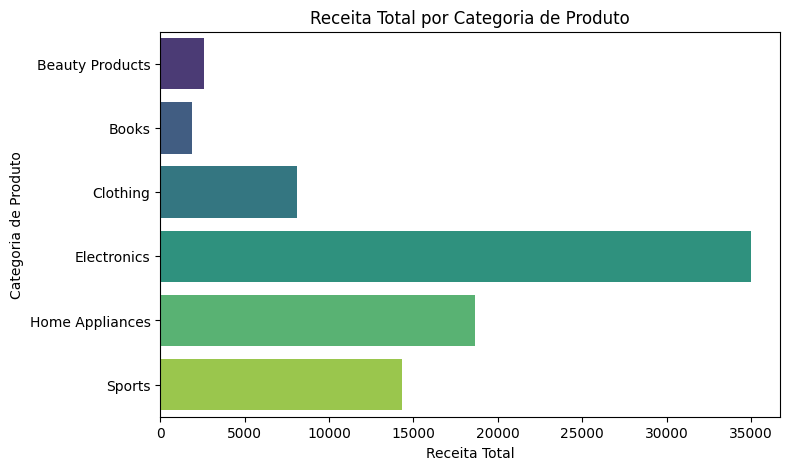

In [44]:

plt.figure(figsize=(8, 5))
sns.barplot(x='Total Revenue', y = "Product Category", data=rpc, palette="viridis")
plt.title("Receita Total por Categoria de Produto")
plt.xlabel("Receita Total")
plt.ylabel("Categoria de Produto")
plt.show()


<ipython-input-43-0edc48ab77ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Units Sold', data=vpr, palette='coolwarm')


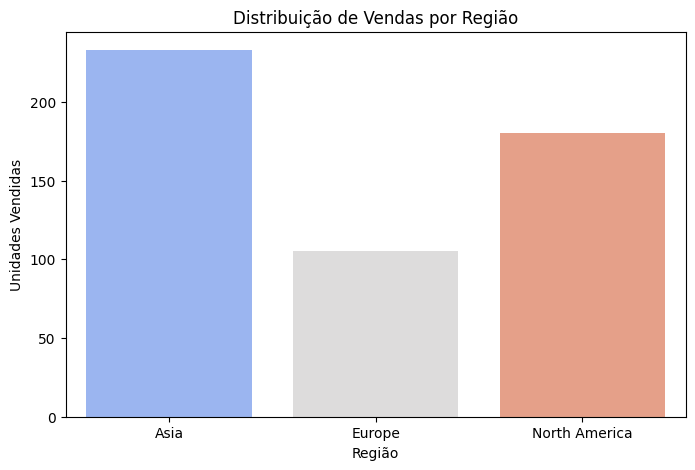

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Units Sold', data=vpr, palette='coolwarm')
plt.title('Distribuição de Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Unidades Vendidas')
plt.show()

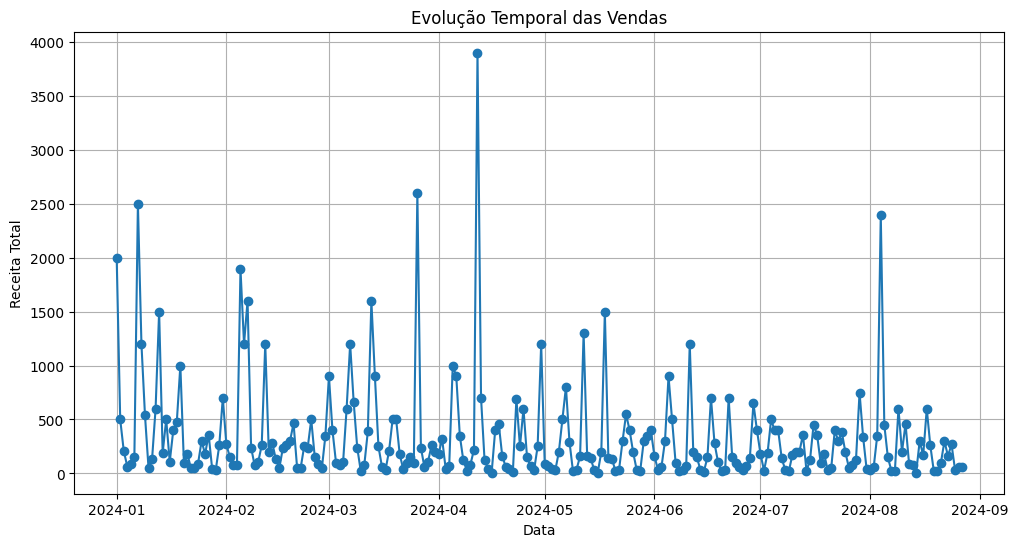

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(vpt['Date'], vpt['Total Revenue'], marker='o')
plt.title('Evolução Temporal das Vendas')
plt.xlabel('Data')
plt.ylabel('Receita Total')
plt.grid(True)
plt.show()

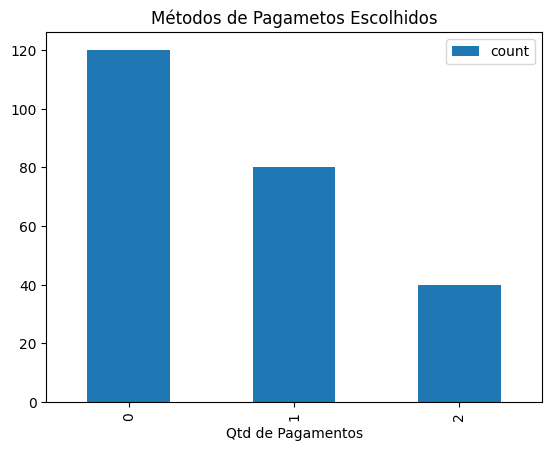

In [51]:
mpag.plot(kind="bar")
plt.xlabel("Qtd de Pagamentos")
plt.ylabel("")
plt.title("Métodos de Pagametos Escolhidos")

plt.show()

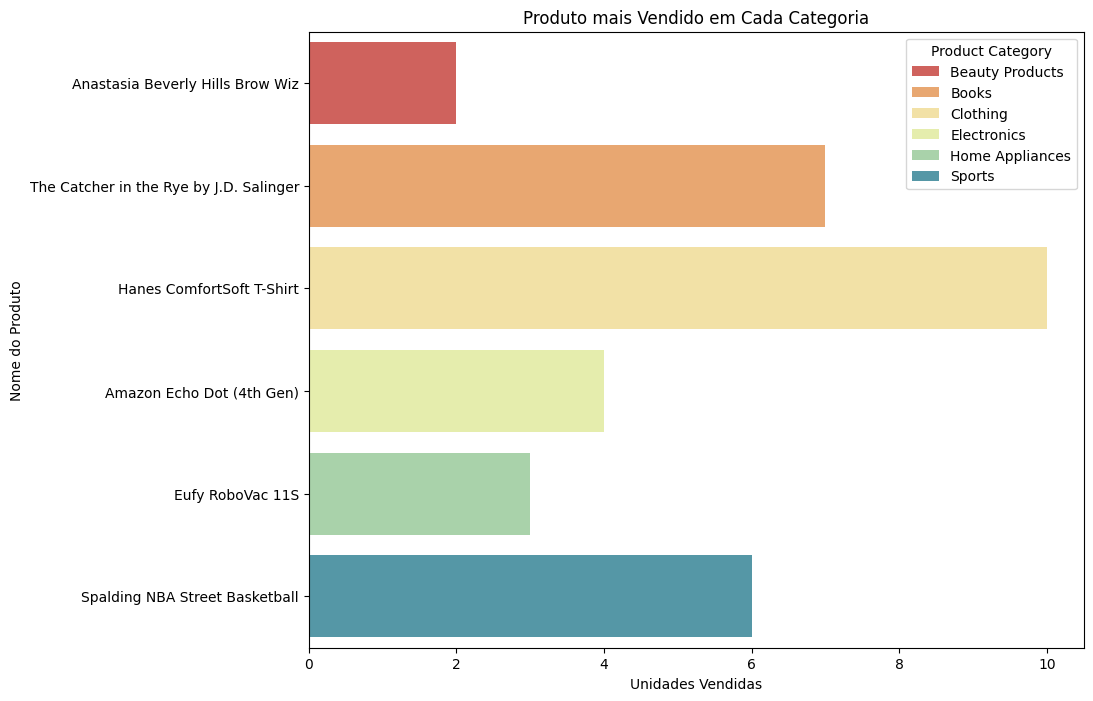

In [52]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Units Sold', y='Product Name', hue='Product Category', data=pvc, palette='Spectral')
plt.title('Produto mais Vendido em Cada Categoria')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Nome do Produto')
plt.show()

<ipython-input-53-5b7ecd456b4d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unit Price', y='Product Category', data=pmp, palette='cubehelix')


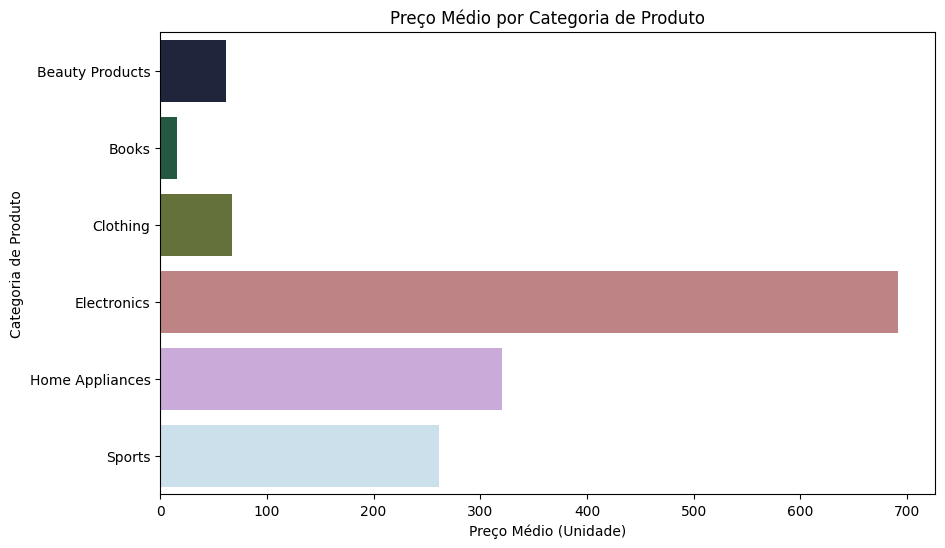

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Unit Price', y='Product Category', data=pmp, palette='cubehelix')
plt.title('Preço Médio por Categoria de Produto')
plt.xlabel('Preço Médio (Unidade)')
plt.ylabel('Categoria de Produto')
plt.show()

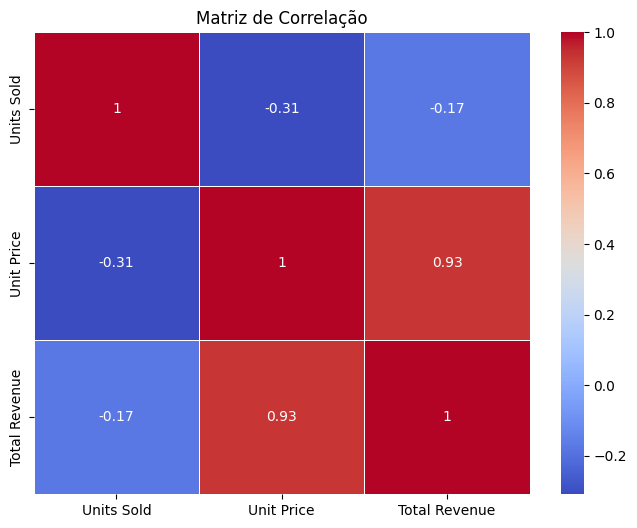

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(corrUvsR, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

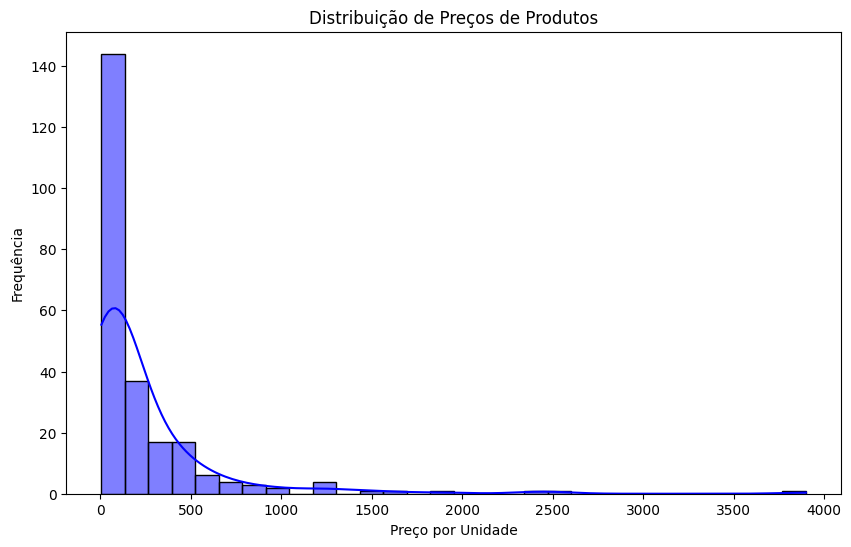

In [55]:
#8 - Entendo a distribuição dos preços


plt.figure(figsize=(10, 6))
sns.histplot(vendas['Unit Price'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Preços de Produtos')
plt.xlabel('Preço por Unidade')
plt.ylabel('Frequência')
plt.show()